# Desafio de Redução de Dimensionalidade com PCA

Utilizando o dataset [`housing.csv`](./housing.csv), que contém informações sobre casas e seus respectivos preços, seu objetivo é aplicar o algoritmo **PCA (Análise de Componentes Principais)** para explorar e reduzir a dimensionalidade dos dados.

## Objetivo

- Reduzir a dimensionalidade do dataset mantendo o máximo de informação possível.
- Facilitar a visualização e análise dos dados.
- Calcular a erro para reconstrução do dataset

## Colunas do Dataset

- **price**: Preço da casa.
- **area**: Área construída da casa (em pés quadrados).
- **bedrooms**: Número de quartos.
- **bathrooms**: Número de banheiros.
- **stories**: Número de andares (pavimentos).
- **mainroad**: Acesso à rua principal (`yes` = possui acesso, `no` = não possui).
- **guestroom**: Possui quarto de hóspedes (`yes` = possui, `no` = não possui).
- **basement**: Possui porão (`yes` = possui, `no` = não possui).
- **hotwaterheating**: Possui aquecimento de água (`yes` = possui, `no` = não possui).
- **airconditioning**: Possui ar-condicionado (`yes` = possui, `no` = não possui).
- **parking**: Número de vagas de estacionamento.
- **prefarea**: Localizada em área preferencial (`yes` = sim, `no` = não).
- **furnishingstatus**: Status de mobília da casa:
    - **furnished**: Casa totalmente mobiliada, pronta para morar, incluindo móveis essenciais como camas, sofás, armários, eletrodomésticos, etc.
    - **semi-furnished**: Casa parcialmente mobiliada, com alguns móveis ou itens básicos, mas não completamente equipada.
    - **unfurnished**: Casa sem mobília, entregue vazia, sem móveis ou eletrodomésticos.

**Dica:** O PCA é uma ferramenta poderosa para eliminar redundâncias, facilitar a visualização e destacar os fatores mais relevantes em datasets com muitos atributos correlacionados.

Boa sorte! 🚀

# Importações

In [30]:
# EDA e Visualizacao de Dados
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


In [31]:
df = pd.read_csv('datasets/housing.csv')

# EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [33]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [34]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


## Análise Univariada

In [35]:
# Distribuição da variável furnishingstatus
percentual_furnishingstatus = df['furnishingstatus'].value_counts(normalize=True) * 100
px.bar(percentual_furnishingstatus, color=percentual_furnishingstatus.index,)

In [36]:
# Distribuição da variável airconditioning
percentual_furnishingstatus = df['airconditioning'].value_counts(normalize=True) * 100
px.bar(percentual_furnishingstatus, color=percentual_furnishingstatus.index,)

In [37]:
# Distribuição da variável parking
percentual_furnishingstatus = df['parking'].value_counts(normalize=True) * 100
px.bar(percentual_furnishingstatus, color=percentual_furnishingstatus.index,)

In [38]:
# Distribuição da variável bedrooms
percentual_furnishingstatus = df['bedrooms'].value_counts(normalize=True) * 100
px.bar(percentual_furnishingstatus, color=percentual_furnishingstatus.index,)

In [39]:
# Distribuição da varíavel price
px.histogram(df, x='price', title="histograma da variável price")

## Análise Bivariada

In [40]:
# Plot de Distruibuição (Box Plot) por price e furnishingstatus
px.box(df, x='furnishingstatus', y='price', title="Box Plot da variável price e furnishingstatus", color='furnishingstatus')

In [41]:
# Plot de Distruibuição (Box Plot) por bedrooms e price
px.box(df, x='bedrooms', y='price', title="Box Plot da variável bedrooms e price")

In [42]:
# Plot de Distruibuição (Box Plot) por stories e price
px.box(df, x='stories', y='price', title="Box Plot da variável stories e price")

In [43]:
# Plot de Distruibuição (Box Plot) por hotwaterheating e price
px.box(df, x='hotwaterheating', y='price', title="Box Plot da variável stories e price")

In [44]:
# Scatterplot de area e price
px.scatter(df, x='area', y='price', color='furnishingstatus', title="Scatterplot de area e price por furnishingstatus")

### Matriz de Correlação

In [45]:
matriz_correlacao_countries = df.corr(numeric_only=True)

<Axes: >

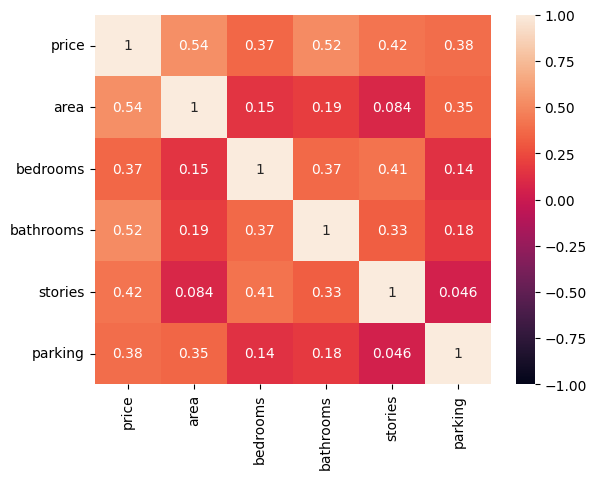

In [46]:
# Plotar Matriz de Correlação
sns.heatmap(matriz_correlacao_countries, vmin=-1, vmax=1, annot=True)

# Treinar o Algoritmo PCA

In [47]:
# Selecionar as colunas para PCA
X = df.copy()

In [48]:
# Transformar colunas booleanas yes/no em 1/0
bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in bool_cols:
    X[col] = X[col].map({'yes': 1, 'no': 0})

In [49]:
# Separar variáveis quantitativas
numeric_features = numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Separar variáveis categóricas
categorical_features = ['furnishingstatus']

In [50]:
# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [51]:
# Criar Pre processor de Transformação
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

In [52]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [53]:
X_transformed

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ...,  0.        ,
         0.        ,  1.        ],
       [-1.61432675, -1.03338891,  0.04727831, ...,  1.        ,
         0.        ,  0.        ],
       [-1.61432675, -0.5998394 ,  0.04727831, ...,  0.        ,
         0.        ,  1.        ]])

In [55]:
# Criar modelo PCA
modelo_pca2 = PCA(n_components=2)
modelo_pca3 = PCA(n_components=3)


In [56]:
X_pca2 = modelo_pca2.fit_transform(X_transformed)
X_pca3 = modelo_pca3.fit_transform(X_transformed)


In [57]:
# Gerar um dataframe com base nos componentes principais
df_pca2 = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])
df_pca3 = pd.DataFrame(data=X_pca3, columns=['PC1', 'PC2', 'PC3'])


In [58]:
df_pca2

,PC1,PC2
0,5.038270,0.380274
1,7.486607,-0.137326
2,4.176727,1.982039
3,4.681767,1.517563
4,3.219831,1.262840
...,...,...
540,-1.908521,1.161579
541,-2.125273,-0.692701
542,-2.549141,0.072510
543,-2.000443,-0.546610


In [59]:
df_pca3

,PC1,PC2,PC3
0,5.038270,0.380274,-0.252675
1,7.486607,-0.137326,0.159924
2,4.176727,1.982039,-1.019401
3,4.681767,1.517563,0.848515
4,3.219831,1.262840,0.158075
...,...,...,...
540,-1.908521,1.161579,1.560302
541,-2.125273,-0.692701,0.666703
542,-2.549141,0.072510,-0.220467
543,-2.000443,-0.546610,0.473765


In [60]:
# Verificar tamanho do dataframe de PCA
len(df_pca2) ,len(df_pca3)

(545, 545)

In [61]:
# Incluir componestes principais no dataframe original
df2 = df.copy()
df3 = df.copy()

df2[['PC1', 'PC2']] = df_pca2
df3[['PC1', 'PC2', 'PC3']] = df_pca3


In [62]:
df2.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,PC1,PC2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.038270,0.380274
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.486607,-0.137326
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.176727,1.982039
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.681767,1.517563
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.219831,1.262840
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,3.789790,1.453218
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,5.557213,-0.570796
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,5.709113,0.572798
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,2.891180,1.326996
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,3.134694,-0.969168


In [63]:
df3.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,PC1,PC2,PC3
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.038270,0.380274,-0.252675
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.486607,-0.137326,0.159924
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.176727,1.982039,-1.019401
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.681767,1.517563,0.848515
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.219831,1.262840,0.158075
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,3.789790,1.453218,-0.097651
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,5.557213,-0.570796,-0.218822
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,5.709113,0.572798,-2.908132
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,2.891180,1.326996,0.193667
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,3.134694,-0.969168,-0.906865


## Visualizar Resultados

In [66]:
# Autovalores
autovalores2 = modelo_pca2.components_  

# Autovetores
autovetores2 = modelo_pca2.explained_variance_
print("Autovetores:\n", autovetores2, "\n")
print("Autovalores:\n", autovalores2)

Autovetores:
 [2.58560656 1.2219237 ] 

Autovalores:
 [[ 0.53864559  0.36744362  0.38781515  0.42850626  0.3640786   0.31226058
   0.06214489  0.01880256 -0.08094745]
 [ 0.11720714  0.51253129 -0.38564283 -0.21601365 -0.49471778  0.52992314
   0.03276993  0.00616336 -0.03893329]]


In [67]:
# Autovalores
autovalores3 = modelo_pca3.components_  

# Autovetores
autovetores3 = modelo_pca3.explained_variance_
print("Autovetores:\n", autovetores3, "\n")
print("Autovalores:\n", autovalores3)

Autovetores:
 [2.58560656 1.2219237  0.67946278] 

Autovalores:
 [[ 0.53864559  0.36744362  0.38781515  0.42850626  0.3640786   0.31226058
   0.06214489  0.01880256 -0.08094745]
 [ 0.11720714  0.51253129 -0.38564283 -0.21601365 -0.49471778  0.52992314
   0.03276993  0.00616336 -0.03893329]
 [-0.24072454 -0.51903833  0.38851313 -0.00371076 -0.13857846  0.70643845
  -0.02522444  0.04783299 -0.02260856]]


In [68]:
# Mostrar Chart 2D com os componentes principais (2 componentes)
fig = px.scatter(df2, x='PC1', y='PC2', title='Visualização PCA 2', width=1200, height=800, hover_data=['price'])
fig.show()

In [69]:
# Mostrar Chart 3D com os componentes principais
fig = px.scatter_3d(df3, x='PC1', y='PC2', z='PC3', 
                    title='Visualização PCA', width=1200, height=800, hover_data=['price'])
fig.show()

### Reconstrução dos dados originais

In [70]:
# Reconstruir os dados com base no PCA

X_recovered2 = modelo_pca2.inverse_transform(X_pca2)
X_recovered3 = modelo_pca3.inverse_transform(X_pca3)

In [72]:
# Calcular o erro de recontrução para 2 componentes
reconstruction_error2 = mean_squared_error(X_transformed, X_recovered2)
print(f"Erro de reconstrução: {reconstruction_error2:.4f}")

Erro de reconstrução: 0.3170


In [73]:
# Calcular o erro de recontrução para 3 componentes
reconstruction_error3 = mean_squared_error(X_transformed, X_recovered3)
print(f"Erro de reconstrução: {reconstruction_error3:.4f}")

Erro de reconstrução: 0.2417


# Conclusão

A aplicação do PCA no Housing Dataset permitiu reduzir a dimensionalidade dos dados mantendo boa parte da variabilidade original. Com apenas 2 componentes principais, o erro de reconstrução foi de **0.3170**, enquanto com 3 componentes o erro caiu para **0.2417**. Isso indica que, mesmo com uma redução significativa do número de variáveis, ainda é possível representar a maior parte da informação contida no conjunto de dados original.

A análise dos componentes principais facilita a visualização dos dados e pode ajudar a identificar padrões, agrupamentos e os fatores que mais influenciam o preço das casas. Além disso, a redução de dimensionalidade pode ser útil para simplificar modelos preditivos, diminuir o risco de overfitting e acelerar o processamento em aplicações de machine learning.

Portanto, o PCA mostrou-se uma ferramenta eficaz para explorar e resumir as principais características do Housing Dataset, tornando a análise mais eficiente